In [1]:
import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
from datetime import datetime

datetime.today().strftime('%Y-%m-%d %H:%M:%S')

'2024-06-27 11:32:42'

In [3]:
# make plot text bigger

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [4]:
plot_path = "./OSIRIS/MagShockZ_hdf5_plt_cnt_0004"

In [5]:
ds = yt.load(plot_path)
current_time = ds.current_time.value.item()

print(current_time)

yt : [WARNING  ] 2024-06-27 11:32:48,479 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2024-06-27 11:32:48,538 Parameters: current_time              = 3.3007078956210473e-09
yt : [INFO     ] 2024-06-27 11:32:48,540 Parameters: domain_dimensions         = [ 800 2560    1]
yt : [INFO     ] 2024-06-27 11:32:48,541 Parameters: domain_left_edge          = [ 0.   -0.05  0.  ]
yt : [INFO     ] 2024-06-27 11:32:48,543 Parameters: domain_right_edge         = [0.3        0.8        6.28318531]
yt : [INFO     ] 2024-06-27 11:32:48,544 Parameters: cosmological_simulation   = 0


3.3007078956210473e-09


In [6]:
ds.domain_dimensions

array([ 800, 2560,    1])

In [7]:
mins = ds.domain_left_edge
maxs = ds.domain_right_edge
print(mins)
print(maxs)

[ 0.   -0.05  0.  ] code_length
[0.3        0.8        6.28318531] code_length


In [8]:
# create covering grid from ds

data_level0 = ds.covering_grid(
    0,
    left_edge=list(mins),
    dims=ds.domain_dimensions
)

# density and electron temp at y=0
dens = pd.DataFrame(data_level0['flash', 'dens'][:, 0, :])
tele = pd.DataFrame(data_level0['flash', 'tele'][:, 0, :])

In [9]:
np_dens = dens.to_numpy()
dens_min = np_dens.min()
dens_max = np_dens.max()
print(dens_min, dens_max)

7.072869152580097e-07 12.583725929260254


In [10]:
extents = [mins[0], maxs[0], mins[1], maxs[1]]    # set extents of plot
time_pretty = round(current_time * 1e9, 1)        # get time in ns
print(extents)

[unyt_quantity(0., 'code_length'), unyt_quantity(0.3, 'code_length'), unyt_quantity(-0.05, 'code_length'), unyt_quantity(0.8, 'code_length')]


In [11]:
ylimmax = 0.5    # we often have vacuum at the top so we want to set the plot y-axis maximum manually

Text(0.5, 1.0, 'Mass density at t=3.3 ns')

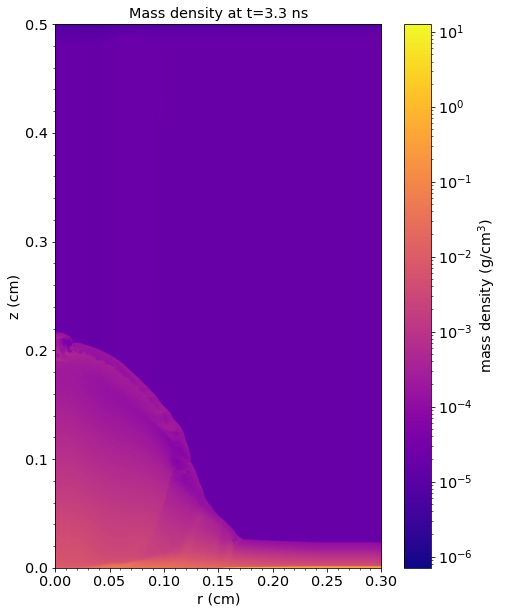

In [19]:
plt.figure(figsize=(10,10))
im = plt.imshow(dens.T, norm=colors.LogNorm(), 
           cmap='plasma', origin='lower', extent=extents)
cbar = plt.colorbar(im, fraction=0.1, pad=0.04) # fraction and pad are for sizing the colorbar
cbar.set_label('mass density (g/$\mathregular{{cm}^3}$)')
plt.xlabel('r (cm)')
plt.ylabel('z (cm)')
plt.minorticks_on()
plt.xlim(0, extents[1])
plt.ylim(0, ylimmax)
plt.title("Mass density at t={} ns".format(time_pretty));
# plt.savefig("slice_mpl_{0}ns_{1}.png".format(time_pretty, datetime.today().strftime('%Y-%m-%d %H:%M:%S')), bbox_inches="tight")

Text(0.5, 1.0, 'Electron temp at t=3.3 ns')

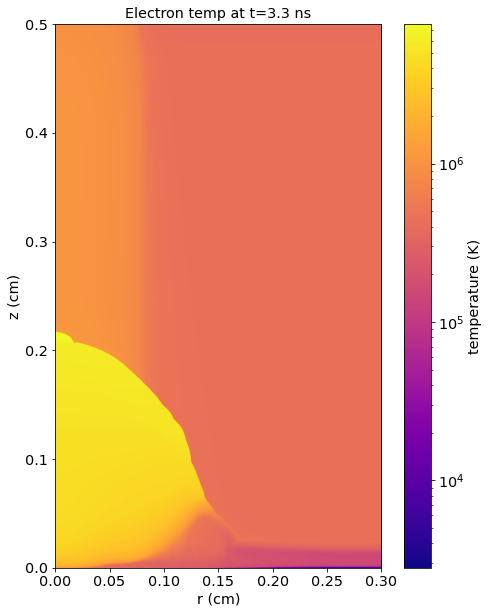

In [18]:
plt.figure(figsize=(10,10))
im = plt.imshow(tele.T, norm=colors.LogNorm(), 
           cmap='plasma', origin='lower', extent=extents)
cbar = plt.colorbar(im, fraction=0.1, pad=0.04)
cbar.set_label('temperature (K)')
plt.xlabel('r (cm)')
plt.ylabel('z (cm)')
plt.xlim(0, extents[1])
plt.ylim(0, ylimmax)
plt.title("Electron temp at t={} ns".format(time_pretty));
# plt.savefig("slice_mpl_{0}ns_{1}.png".format(time_pretty, datetime.today().strftime('%Y-%m-%d %H:%M:%S')), bbox_inches="tight")

yt : [INFO     ] 2024-06-19 14:13:09,889 xlim = 0.000000 0.300000
yt : [INFO     ] 2024-06-19 14:13:09,890 ylim = -0.050000 0.800000
yt : [INFO     ] 2024-06-19 14:13:09,890 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2024-06-19 14:13:09,891 xlim = 0.000000 0.300000
yt : [INFO     ] 2024-06-19 14:13:09,892 ylim = -0.050000 0.800000
yt : [INFO     ] 2024-06-19 14:13:09,894 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



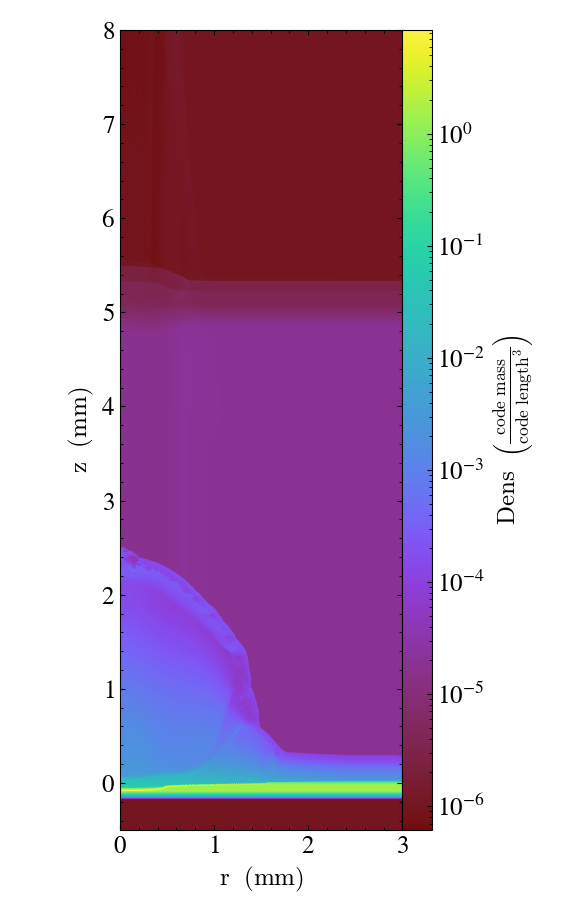

In [17]:
# you can get a very rough slice plot using the native yt plotter

slc = yt.SlicePlot(ds, "theta", "dens")
slc